In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Data Paths
flights_ml_data = 'resources/flights_cleaned.csv'

df = pd.read_csv(flights_ml_data)
df.head(3)

,Unnamed: 0,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,4296142,9,25,5,VX,953,N626VA,SAN,SFO,915,-2.0,79.0,62.0,447,1027.0,5.0,1045,1032.0,-13.0,NaN,NaN,NaN,NaN,NaN
1,1602885,4,13,1,UA,467,N547UA,DEN,LAX,1130,-1.0,140.0,115.0,862,1239.0,10.0,1300,1249.0,-11.0,NaN,NaN,NaN,NaN,NaN
2,2274770,5,25,1,WN,2170,N915WN,LAX,DEN,810,-5.0,144.0,113.0,862,1108.0,21.0,1145,1129.0,-16.0,NaN,NaN,NaN,NaN,NaN


In [2]:
# Create directory
dirName = 'figures'
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

Directory  figures  already exists


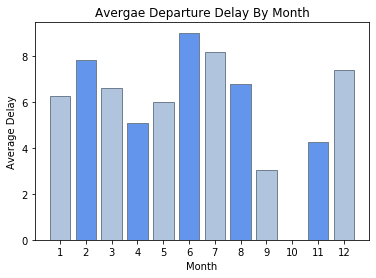

<Figure size 432x288 with 0 Axes>

In [3]:
months = df.groupby('MONTH')['DEPARTURE_DELAY'].sum()
month_counts = df['MONTH'].value_counts()
month_delays_avg = months/month_counts


numbers = np.arange(1, 13, step=1)
color = ['lightsteelblue', 'cornflowerblue']

plt.bar(month_delays_avg.index, month_delays_avg, color=color, edgecolor = 'slategrey', )

plt.xlabel('Month')
plt.ylabel('Average Delay')
plt.title('Avergae Departure Delay By Month')
plt.xticks(numbers)


plt.show()
plt.savefig('figures/month_departure_delay')

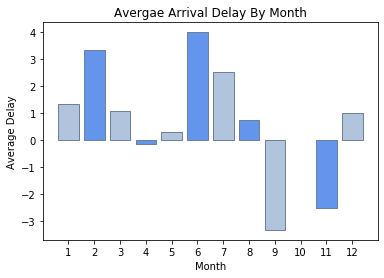

<Figure size 432x288 with 0 Axes>

In [4]:
months = df.groupby('MONTH')['ARRIVAL_DELAY'].sum()
month_counts = df['MONTH'].value_counts()
month_delays_avg = months/month_counts

numbers = np.arange(1, 13, step=1)
color = ['lightsteelblue', 'cornflowerblue']

plt.bar(month_delays_avg.index, month_delays_avg, color=color, edgecolor = 'slategrey', )

plt.xlabel('Month')
plt.ylabel('Average Delay')
plt.title('Avergae Arrival Delay By Month')
plt.xticks(numbers)


plt.show()
plt.savefig('figures/month_arrival_delay')

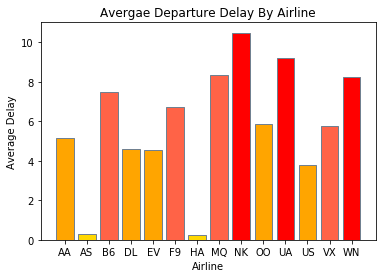

<Figure size 432x288 with 0 Axes>

In [5]:
airline_delays = df.groupby('AIRLINE')['DEPARTURE_DELAY'].sum()
airline_counts = df['AIRLINE'].value_counts()
airline_delays_avg = airline_delays / airline_counts


color = ['orange','gold','tomato', 'orange', 'orange', 'tomato', 'gold', 'tomato', 'red', 'orange', 'red', 'orange', 'tomato', 'red']

plt.bar(airline_delays_avg.index, airline_delays_avg, color=color, edgecolor = 'slategrey')

plt.xlabel('Airline')
plt.ylabel('Average Delay')
plt.title('Avergae Departure Delay By Airline')


plt.show()

plt.savefig('figures/airline_departure_delay')

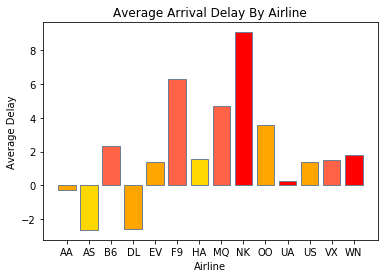

<Figure size 432x288 with 0 Axes>

In [6]:
airline_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].sum()
airline_counts = df['AIRLINE'].value_counts()
airline_delays_avg = airline_delays / airline_counts


color = ['orange','gold','tomato', 'orange', 'orange', 'tomato', 'gold', 'tomato', 'red', 'orange', 'red', 'orange', 'tomato', 'red']

plt.bar(airline_delays_avg.index, airline_delays_avg, color=color, edgecolor = 'slategrey')

plt.xlabel('Airline')
plt.ylabel('Average Delay')
plt.title('Average Arrival Delay By Airline')


plt.show()

plt.savefig('figures/airline_arrival_delay')

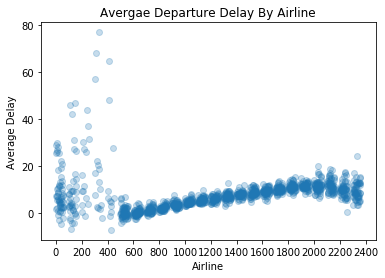

<Figure size 432x288 with 0 Axes>

In [7]:
time = df.groupby('SCHEDULED_DEPARTURE')['DEPARTURE_DELAY'].sum()
time_counts = df['SCHEDULED_DEPARTURE'].value_counts()
time_delays_avg = time/time_counts


plt.scatter(time_delays_avg.index, time_delays_avg, alpha=.25)

plt.xlabel('Airline')
plt.ylabel('Average Delay')
plt.title('Avergae Departure Delay By Airline')

plt.xticks(np.arange(0, 2600, step=200))
plt.show()

plt.savefig('figures/time_departure_delay')

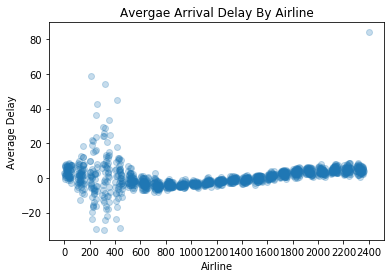

<Figure size 432x288 with 0 Axes>

In [8]:
time = df.groupby('SCHEDULED_ARRIVAL')['ARRIVAL_DELAY'].sum()
time_counts = df['SCHEDULED_ARRIVAL'].value_counts()
time_delays_avg = time/time_counts


plt.scatter(time_delays_avg.index, time_delays_avg, alpha=.25)

plt.xlabel('Airline')
plt.ylabel('Average Delay')
plt.title('Avergae Arrival Delay By Airline')

plt.xticks(np.arange(0, 2600, step=200))
plt.show()

plt.savefig('figures/time_arrival_delay')